In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.datasets import cifar10

from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
import pandas as pd # pandas

from keras.utils import np_utils


### 1. Loading the dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
# Lets determine the dataset characteristics
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))
print('Training Label: {}'.format(y_train.shape))
print('Testing Label: {}'.format(y_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)
Training Label: (50000, 1)
Testing Label: (10000, 1)


In [4]:
# Now for a single image 
print(X_train[0].shape,y_train[0].shape)

(32, 32, 3) (1,)


### 2. Preprocessing the dataset


In [5]:
# normalize the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train_norm = X_train / 255.0
X_test_norm= X_test / 255.0

In [6]:
# class labels shape
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [7]:
# class labels reshape
y_train_reshape = y_train.reshape(-1,)
y_train[:5]
y_test_reshape = y_test.reshape(-1,)
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [8]:
nsamples_train, nx_train, ny_train, c_train = X_train_norm.shape
nsamples_test, nx_test, ny_test, c_test = X_test_norm.shape

In [9]:
X_train_flatten = X_train_norm.reshape((nsamples_train, nx_train*ny_train*c_train))
X_test_flatten = X_test_norm.reshape((nsamples_test, nx_test*ny_test*c_test))

In [10]:
X_train_flatten.shape,X_test_flatten.shape

((50000, 3072), (10000, 3072))

In [11]:
# Lets determine the dataset characteristics
print('Training Images: {}'.format(X_train_flatten.shape))
print('Testing Images: {}'.format(X_test_flatten.shape))
print('Training Label: {}'.format(y_train_reshape.shape))
print('Testing Label: {}'.format(y_test_reshape.shape))

Training Images: (50000, 3072)
Testing Images: (10000, 3072)
Training Label: (50000,)
Testing Label: (10000,)


## Ploting Images

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index].astype(int)])

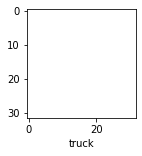

In [14]:
plot_sample(X_train, y_train_reshape, 1)


In [15]:
X_train_flatten_df = pd.DataFrame(X_train_flatten)
X_test_flatten_df = pd.DataFrame(X_test_flatten)
y_train_reshape_df=pd.DataFrame(y_train_reshape)
y_train_reshape_df=pd.DataFrame(y_test_reshape)

In [16]:
X_train_flatten_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.512591,0.533554,0.519819,0.510354,0.531147,0.517073,0.513923,0.534299,0.519927,0.515956,...,0.446580,0.497170,0.492930,0.446395,0.496333,0.492617,0.446691,0.496624,0.493531,0.448556
std,0.287894,0.285914,0.315489,0.284089,0.281966,0.312149,0.283296,0.281077,0.311509,0.282418,...,0.253878,0.250803,0.241534,0.254489,0.251680,0.242477,0.255736,0.254613,0.245683,0.259128
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.278431,0.301961,0.239216,0.278431,0.305882,0.239216,0.286275,0.309804,0.243137,0.286275,...,0.250980,0.309804,0.317647,0.250980,0.309804,0.317647,0.250980,0.305882,0.313726,0.247059
50%,0.501961,0.529412,0.498039,0.498039,0.529412,0.498039,0.505882,0.533333,0.501961,0.509804,...,0.415686,0.486275,0.482353,0.415686,0.486275,0.482353,0.415686,0.486275,0.482353,0.415686
75%,0.741176,0.764706,0.811765,0.737255,0.756863,0.807843,0.737255,0.760784,0.807843,0.737255,...,0.615686,0.674510,0.654902,0.615686,0.674510,0.654902,0.615686,0.674510,0.658824,0.619608
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_train_flatten_scaled = scaler.fit_transform(X_train_flatten)
X_train_flatten_scaled

array([[-0.976824  , -1.0157583 , -0.8645707 , ..., -0.05605001,
        -0.5403196 , -0.64140236],
       [ 0.31723994,  0.56158835,  0.67677957, ...,  0.25199485,
         0.11412382,  0.44823772],
       [ 1.693034  ,  1.6314406 ,  1.5220361 , ..., -0.7183462 ,
        -0.6360918 , -0.4597957 ],
       ...,
       [-1.3037454 ,  0.5753044 ,  1.2734312 , ..., -1.7656983 ,
        -1.5140038 , -0.97434795],
       [ 0.79400027,  1.0279342 ,  1.3355824 , ...,  1.0529112 ,
         1.0239596 ,  0.8568527 ],
       [ 1.3388692 ,  1.2748232 ,  1.3231522 , ...,  0.5600395 ,
         0.5929848 ,  0.70551383]], dtype=float32)

### Base Line Model - Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [20]:
# define the multinomial logistic regression model
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [21]:
# define the multinomial logistic regression model
# model = LogisticRegression()

In [22]:
# model.fit(X_train_flatten, y_train_reshape)
# model.score(X_test_flatten,y_test_reshape)

In [23]:
# model = GaussianNB()
# y_pred = model.fit(X_train_flatten, y_train_reshape).predict(X_train_flatten)
# model.score(X_test_flatten,y_test_reshape)

###PCA - Principle Component Analysis

In [24]:
# from sklearn.decomposition import PCA

# pca = PCA(0.95)
# X_pca = pca.fit_transform(X_train_flatten)
# X_pca.shape

# New Model

In [25]:
# model = LogisticRegression()
# model.fit(X_pca, y_train)
# y_pca_preidct=model.predict(X_pca)
# model.score(y_pca_preidct, y_test)

In [26]:
# model.score(X_pca, y_train_reshape)

In [35]:
from sklearn.datasets import make_classification

X,y=make_classification(
    n_samples=1000,n_features=30,n_informative=10,random_state=10
)
X.shape,y.shape

((1000, 30), (1000,))

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


In [42]:
model = LogisticRegression(class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats = 2, random_state=0)
scores=cross_val_score(model,X,y,scoring = 'accuracy',cv=cv, n_jobs=1)

In [50]:
print(f"Accuracy: {np.mean(scores):.3f}( std: {np.std(scores):.3f})")

Accuracy: 0.808( std: 0.034)


In [51]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


In [54]:
steps = [
    ("PCA",PCA(n_components=20)),
    ('m',LogisticRegression(class_weight='balanced')),
]
model=Pipeline(steps=steps)

In [55]:
%%time
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats = 2, random_state=0)
scores=cross_val_score(model,X,y,scoring = 'accuracy',cv=cv, n_jobs=1)
print(f"Accuracy: {np.mean(scores):.3f}( std: {np.std(scores):.3f})")

Accuracy: 0.819( std: 0.038)
CPU times: user 195 ms, sys: 308 ms, total: 504 ms
Wall time: 298 ms


## Isomap Embedding

In [57]:
 from sklearn.manifold import Isomap
# embedding = Isomap(n_components=2)
# X_transformed = embedding.fit_transform(X_train_flatten)
# # X_transformed.shape

In [69]:
steps = [
    ("ISO",Isomap(n_components=20)),
    ('m',LogisticRegression(class_weight='balanced')),
]
model=Pipeline(steps=steps)

In [70]:
%%time
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats = 2, random_state=0)
scores=cross_val_score(model,X,y,scoring = 'accuracy',cv=cv, n_jobs=1)
print(f"Accuracy: {np.mean(scores):.3f}( std: {np.std(scores):.3f})")

Accuracy: 0.842( std: 0.026)
CPU times: user 4.79 s, sys: 1.55 s, total: 6.34 s
Wall time: 4.67 s


## Locally Linear Embedding

In [71]:
from sklearn.manifold import LocallyLinearEmbedding

steps = [
    ("LIE",LocallyLinearEmbedding(n_components=20)),
    ('m',LogisticRegression(class_weight='balanced')),
]
model=Pipeline(steps=steps)

# embedding = LocallyLinearEmbedding(n_components=2)
# X_transformed = embedding.fit_transform(X[:100])
# X_transformed.shape

In [72]:
%%time
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats = 2, random_state=0)
scores=cross_val_score(model,X,y,scoring = 'accuracy',cv=cv, n_jobs=1)
print(f"Accuracy: {np.mean(scores):.3f}( std: {np.std(scores):.3f})")

Accuracy: 0.854( std: 0.012)
CPU times: user 2.83 s, sys: 1.08 s, total: 3.91 s
Wall time: 2.93 s


## Multidimensional scaling





In [90]:
from sklearn.manifold import MDS
from imblearn.pipeline import make_pipeline

steps = [
    ("MDS",MDS(n_components=20,normalized_stress=False,)),
    ('m',LogisticRegression(class_weight='balanced')),
]
model=Pipeline(steps=steps)


In [93]:
mds=MDS(n_components=20,n_jobs=-1,normalized_stress=False,)
X_transform=mds.fit_transform(X)

In [94]:
stress = mds.stress_
print(stress)

91634.68248226335


In [80]:
%%time
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats = 2, random_state=0)

CPU times: user 30 µs, sys: 0 ns, total: 30 µs
Wall time: 33.4 µs


In [91]:
scores=cross_val_score(model,X,y,scoring = 'accuracy',cv=cv, n_jobs=-1,error_score='raise')


TypeError: ignored

In [ ]:
print(f"Accuracy: {np.mean(scores):.3f}( std: {np.std(scores):.3f})")

## SpectralEmbedding



In [96]:
from sklearn.manifold import SpectralEmbedding


In [97]:
steps = [
    ("EspEMb",SpectralEmbedding(n_components=20)),
    ('m',LogisticRegression(class_weight='balanced')),
]
model=Pipeline(steps=steps)

In [98]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats = 2, random_state=0)
scores=cross_val_score(model,X,y,scoring = 'accuracy',cv=cv, n_jobs=1)
print(f"Accuracy: {np.mean(scores):.3f}( std: {np.std(scores):.3f})")

ValueError: ignored

Computing embedding
Done.
ward :	0.10s
average :	0.09s
complete :	0.14s
single :	0.03s


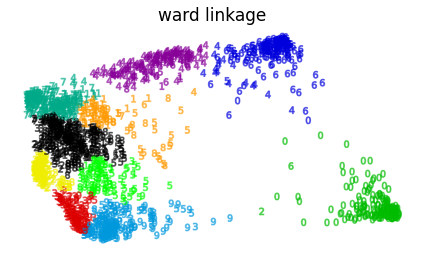

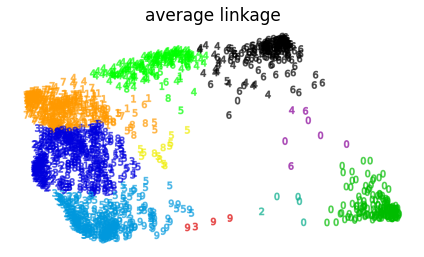

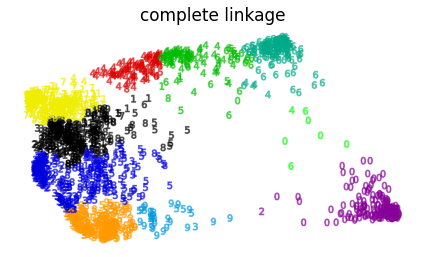

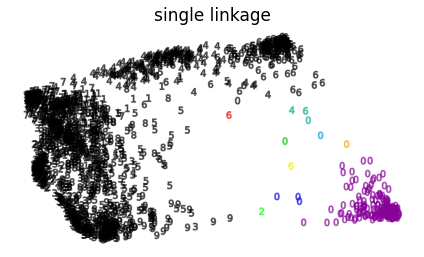

In [99]:
from time import time

import numpy as np
from matplotlib import pyplot as plt

from sklearn import manifold, datasets

digits = datasets.load_digits()
X, y = digits.data, digits.target
n_samples, n_features = X.shape

np.random.seed(0)


# ----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for digit in digits.target_names:
        plt.scatter(
            *X_red[y == digit].T,
            marker=f"${digit}$",
            s=50,
            c=plt.cm.nipy_spectral(labels[y == digit] / 10),
            alpha=0.5,
        )

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# ----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()

## T-distributed Stochastic Neighbor Embedding

In [29]:
from sklearn import manifold
from sklearn import datasets

from IPython import display
import pylab as pl

from sklearn import preprocessing 
from collections import OrderedDict
from functools import partial 
from time import time

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

import seaborn as sns
from sklearn.decomposition import PCA




In [30]:
X,y = datasets.load_digits(return_X_y=True)

In [31]:
X.shape,y.shape

((1797, 64), (1797,))

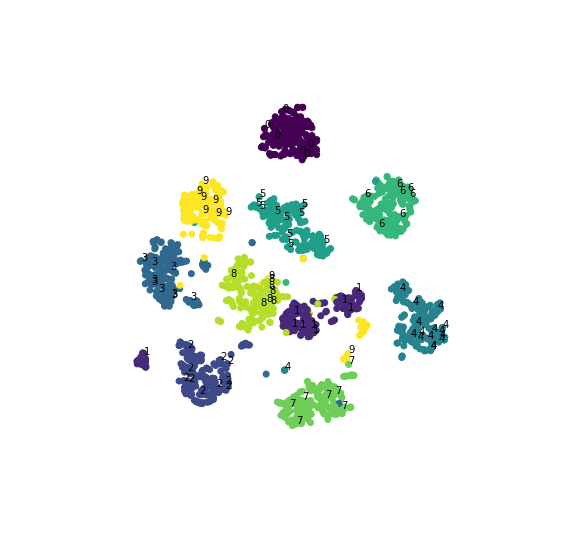

In [34]:
for i in range (250,500,2):
  fig = plt.figure(figsize = (10,10))
  #Model
  xe = manifold.TSNE (n_components=2, n_iter=i, perplexity=30,random_state=0).fit_transform(X)
  #Plot
  plt.scatter(xe[:,0], xe[:,1],c=y)
  
  for i,txt in enumerate(y.tolist()):
    if (i%20 == 0): 
      plt.annotate(str(txt),(xe[i,0], xe[i,1]))


plt.xlim(-60,60)
plt.ylim(-60,60)

plt.axis('off')
display.clear_output(wait=True)
display.display(pl.gcf())

plt.clf()
plt.cla()
plt.close('all')


In [ ]:
# Y_train_coded = np_utils.to_categorical(y_train)
# Y_test_coded= np_utils.to_categorical(y_test)
# num_classes = Y_test_coded.shape[1]

# print(Y_train_coded.shape)
# print(Y_test_coded[0])